* Alexandra Keamy A13589993
* Elizabeth Cisneros   A13759690
* Kevin Gonzalez  A99090166
* Xuanyu Wu A14482228

Project Repo: https://github.com/kevinice95/Cogs118C-final (kevinice95=Kevin Gonzalez. Note that while it was mostly Kevin pushing, a lot of the work was code with everyone sitting together and working on one computer)


# Characteristic Frequencies in Monkey ECoG

## Research Question and Hypothesis

Research Question: In our study, we want to look at the frequencies associated with different stages in the occipital lobe: awake eyes open, awake eyes closed, and anesthetized. We also want to see if there are different characteristic frequencies in the different areas of the brain or if they are all the same for any given state. In other words, does the characteristic frequencies we find in the occipital lobe of each state carry over to the other brain regions or are these frequencies region-specific? We will be doing so by analyzing a 5 minute long ECoG data recorded from a monkey's whole cortex during the three different stages of interest and focusing on 3 channels located in the occipital lobe, temporal lobe, and cingulate gyrus. 

Hypothesis: After reviewing the literature, we believe we will find a dominant alpha frequency in the awake eyes open stage, a stronger alpha frequency in the awake eyes closed stage, and delta or theta frequency in the anesthetized stage in the occipital lobe. We also predict we will find different characteristic frequencies across the different brain regions for the awake eyes open and awake eyes-closed state but the same characteristic frequency across brain regions for the anesthetized state due to neural synchrony. 

## Discussion on existing research 
Neural oscillations or brain waves, result from the summation of many ionic processes in the brain, such as transmembrane currents that can be seen during membrane potentials or action potentials. When there is synchrony in the brain these oscillation signals become stronger and are one of the main mechanisms that enable the synchronization of neural activity throughout the brain. Many believe that these oscillations play an important role in cognition and are generated through multiple mechanisms. For instance, the alpha frequency band (8-12 Hz) was one of the first frequencies recorded by German scientist Hans Berger who noticed an increase in alpha activity in the occipital lobe when a subject closed their eyes (Berger, 1929). These first signals were recorded in the 1920s, and since then, there has been extensive research on the alpha wave as well as the full spectrum of oscillations detected in the brain. As an example, alpha power has been observed to increase in a relaxed state in the frontal and occipital regions in comparison to a relaxed state while performing an attention task (A. Sharma and M. Singh, 2015). Oscillations have been studied under clinical settings as well, such as during the course of anesthesia. It has been observed that alpha waves become dominant in a signal when propofol Ce, an anesthetic, is initially increased, however, after propofol Ce is increased further, alpha waves become smaller and theta and delta waves become stronger (Hagihira S., 2017). However, because the level of concentration of anesthetics administered to the monkeys in our data set is unknown it is hard to say whether the results in our analysis are due to these higher concentrations. In addition, the levels of concentration administered to patients in this paper is unknown, making it difficult to make comparisons and replicate the study to further expand on their research. Relevantly, studies on animals have also found an increase in neural synchrony after the induction of anesthetics prompting one to question the level of synchrony in the brain under various other conditions and the role that it plays in the brain (Li, D, Voss, LJ, Sleigh, JW, Li, X, 2013). 


In [1]:
# Import important packages
%matplotlib inline
from scipy import io
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
from scipy import io, signal 

In [2]:
# This function returns the power and frequencies from signal. We got this from HW3
def compute_pwsp(sig, fs):
    pwsp = np.abs(np.fft.fft(sig))**2 
    freqs = np.fft.fftfreq(len(sig),d=1/fs)
    return pwsp, freqs

# This function we obtained from homework3. We changed it to only plot the plots we care about and return the 
# Analytical Signal.
def getanalytical(sig,cutoff,pass_zero,cutoff2="Onlyone"):
    """
    define filter, plot filter impulse response and filter the original signal
    """
    if cutoff2 == "Onlyone":
        filt_order = int(3*fs/cutoff)+1
        filt_coefs = signal.firwin(filt_order, cutoff=cutoff, fs=fs, pass_zero=pass_zero)
    else:
        filt_order = int(3*fs/(cutoff2-cutoff))+1
        filt_coefs = signal.firwin(filt_order, cutoff=(cutoff,cutoff2), fs=fs, pass_zero=pass_zero)       
        
    freq_resp = np.fft.fft(filt_coefs, n=int(fs))
    mag_resp = abs(freq_resp)**2
    ph_resp = np.angle(freq_resp)
    freqs = np.fft.fftfreq(int(fs),1/fs)
    
    plt.figure(figsize=(15,4))
    lfp_filt = np.convolve(sig, filt_coefs, mode='same')
    plt.plot(time, sig, alpha=0.8, label='Original')
    plt.plot(time, lfp_filt, alpha=0.8, label='Filtered')
    plt.xlim([0,5])
    plt.legend()
    plt.title('Wave Comparison')
    plt.xlabel('Time(s)');plt.ylabel('Voltage (V)')

    plt.figure(figsize=(15,4))
    pwsp, freqs_win = compute_pwsp(sig, fs)
    pwsp_s, _ = compute_pwsp(lfp_filt, fs)
    plt.plot(freqs_win, pwsp, alpha=0.8, label='Original')
    plt.plot(freqs_win, pwsp_s, alpha=0.8, label='Filtered')
    plt.xlim([-25,25])
    plt.legend()
    plt.title('Power Spectrum Comparison')
    plt.xlabel('Frequency (Hz))');plt.ylabel('Power')
    return(lfp_filt)

# This function Richard Gao provided to us, and we just copied but without the comments
def plot_spectrogram(spg, t, f, freq_lims=[0,100], plot_db=False):
    plt.figure(figsize=(15,4))
    if plot_db:
        plt.imshow(10*np.log10(spg), aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    else:
        plt.imshow(spg, aspect='auto', extent=[t[0], t[-1], f[-1], f[0]])
    plt.xlabel('Time'); plt.ylabel('Log10 Frequency(Hz)');
    plt.ylim(freq_lims)
    plt.colorbar()
    plt.tight_layout()

In [3]:
# Load dataset and display layout
data = io.loadmat('ECoG_monkey/ECoG_monkey.mat', squeeze_me = True)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Jul 24 20:09:57 2019',
 '__version__': '1.0',
 '__globals__': [],
 'ecog_anes': array([[  68,   66,   76, ...,   39,   39,   31],
        [-634, -627, -618, ..., -893, -869, -868],
        [-283, -280, -260, ...,  -96,  -73,  -95]], dtype=int16),
 'ecog_eyesclosed': array([[ 207,  201,  205, ...,   29,   39,   30],
        [ -32,   10,   26, ..., -195, -187, -180],
        [ -59,  -64,  -98, ...,  -32,  -29,    3]], dtype=int16),
 'ecog_eyesopen': array([[ -17,  -28,  -33, ...,  -59,  -70,  -76],
        [-117, -118, -100, ..., -132, -143, -143],
        [-792, -826, -875, ..., -524, -495, -427]], dtype=int16),
 'elec_num': array([52, 70, 91], dtype=uint8),
 'fs': 1000,
 'labels': array(['cingulate', 'occipital', 'temporal'], dtype=object)}

## Methods and Parameter Decision

STFT:  We first used STFT.  We used a short-time fourier transform for every state in the occipital lobe. The three states are anesthetized, awake eyes open, and awake eyes closed. We decided to look solely at the occipital lobe, because through extensive literature review we found that alpha waves were present in the occipital lobe. The goal of the STFT was to find the sinusoidal frequency and phase content as it changes over time. 

Spectrograms and Power Spectrum: Once we performed the STFT for every state in the occipital lobe, we created a spectrogram using signal.spectrogram. We picked a window size of 4, because we found some low frequency in our first pass so we wanted to ensure we capture all frequencies. Since these frequencies should be present and not changing quickly, we are okay with giving away some temporal resolution. We used the log power for spectrogram, so we could put higher frequencies at a similar scale. After getting the spectrogram, we used it to get the power spectrum of the signal. By doing this, we were able to find the dominant frequencies within each state.

Filtering: Based on our observations of the dominant frequencies from plotting the spectrogram, we used a low-pass filter that cuts off at 3Hz for the anesthetized state since the curve in its power spectrum is steeper than those of the other two. We used 5Hz as a cut-off value for the other stages, based on the plots of the power spectrum. We chose a low-pass filter over a band-pass filter in this case because the range of most dominant frequencies for all three stages start around 0. We filtered as a way to isolate the dominant frequencies within each state. 
Comparing Filtered and Raw Signal: After we isolated the frequency range we picked for each state, we compared the voltage change in the time domain and the power spectra of these filtered signals with those of the original signals. We did this to determine if the frequency ranges we picked are critical to the recorded brain signals. 

Correlation: To represent the “importance” of the frequencies we picked, we calculated the correlations between the filtered signals and the original signals. We looked at the correlation of the three states to see if filtering out the non-dominant frequencies drastically changed the signal. 

Hilbert:  We decided to use Hilbert transform to calculate the analytical signal, so we could get better time and frequency resolutions.  We were able to do so because, we chose a relatively narrow band and our data does not appear to be very noisy. We used Hilbert transform to bandpass filter signature frequencies and compare them among the different brain states. We also did this for the other two brain areas. 
Cross Correlation: After getting nine different Hilbert transforms for each brain state in all three brain areas, we computed cross correlations. Cross correlation measures the similarity between two series as a function of displacement of one another. We used this in our analysis to test for temporal correlation between the same state among the different regions and computed cross-correlation to find any time delays. 


In [4]:
# Here we Extract important variables that we will use for our analysis. 
anes = data['ecog_anes'][1]
eyesclosed = data['ecog_eyesclosed'][1]
eyesopen = data['ecog_eyesopen'][1]
fs = data['fs']
time = np.arange(0,len(anes)/fs,1/fs)

In [5]:
# Extracting data for awake
opencing = data['ecog_eyesopen'][0]
openocci = data['ecog_eyesopen'][1]
opentemp = data['ecog_eyesopen'][2]
# Extracting data for eyes closed
closedcing = data['ecog_eyesclosed'][0]
closedocci = data['ecog_eyesclosed'][1]
closedtemp = data['ecog_eyesclosed'][2]
# Extracting data for anesthesized
anescing = data['ecog_anes'][0]
anesocci = data['ecog_anes'][1]
anestemp = data['ecog_anes'][2]

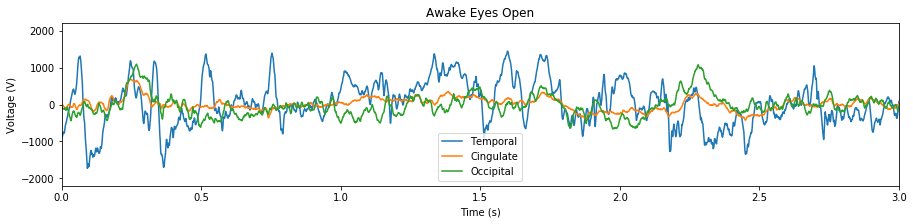

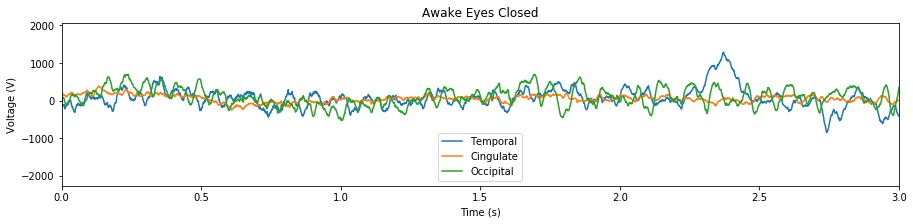

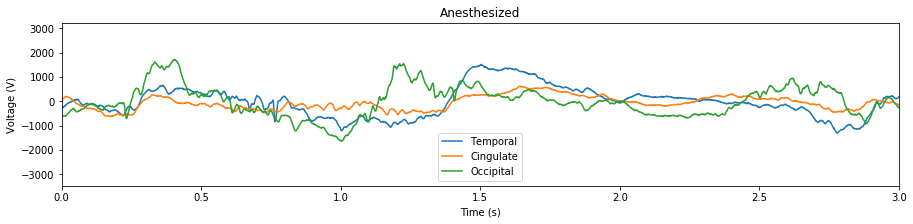

In [6]:
# Plotting awake eyes open data
plt.figure(figsize=(15,3))
plt.plot(time,opentemp,label="Temporal")
plt.plot(time,opencing,label="Cingulate")
plt.plot(time,openocci,label="Occipital")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.xlim([0,3])
plt.title('Awake Eyes Open')
plt.legend(loc='lower center')

# Plotting awake eyes closed data
plt.figure(figsize=(15,3))
plt.plot(time,closedtemp,label="Temporal")
plt.plot(time,closedcing,label="Cingulate")
plt.plot(time,closedocci,label="Occipital")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.xlim([0,3])
plt.title('Awake Eyes Closed')
plt.legend(loc='lower center')

# Plotting anesthesized data
plt.figure(figsize=(15,3))
plt.plot(time,anestemp,label="Temporal")
plt.plot(time,anescing,label="Cingulate")
plt.plot(time,anesocci,label="Occipital")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.xlim([0,3])
plt.title('Anesthesized')
plt.legend(loc='lower center')

(0, 5)

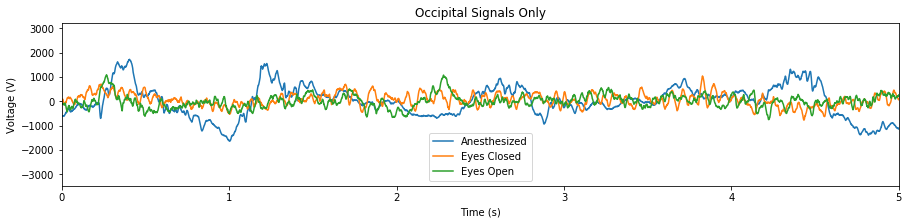

In [7]:
# Plotting occipital signals only
plt.figure(figsize=(15,3))
plt.plot(time,anes,label="Anesthesized")
plt.plot(time,eyesclosed,label="Eyes Closed")
plt.plot(time,eyesopen,label="Eyes Open")
plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
plt.legend(loc='lower center')
plt.title('Occipital Signals Only')
plt.xlim([0,5])

## Analysis 
Power spectrograms and Power spectra: From the power spectrograms, we found that the most dominant frequencies (the brightest part in the spectrograms) are mostly in the range of 0-30Hz. So we plotted the power spectra for each of the states and zoomed in to 0-30Hz range.  It is clear that for both awake stages, the major frequencies are in the range of 0-5Hz, and those of anesthetized stage are in 0-3Hz range.
Note the y-axis of the plot for anesthetized data, it is significantly higher than the others. It might be because lower frequency tend to have higher power in brain signals. It may also prove the previous study that claims brain signals are more synchronized in anesthetized state.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


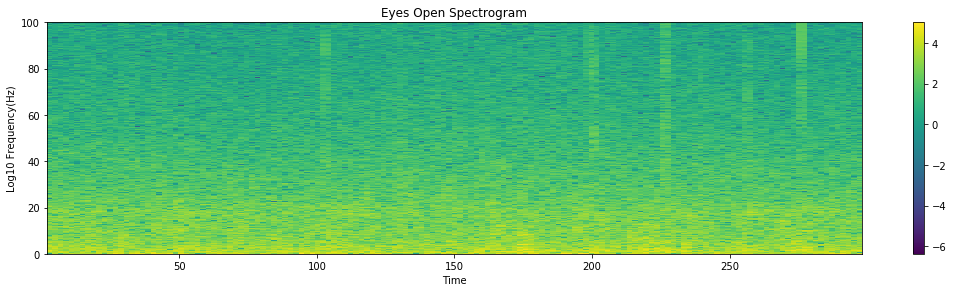

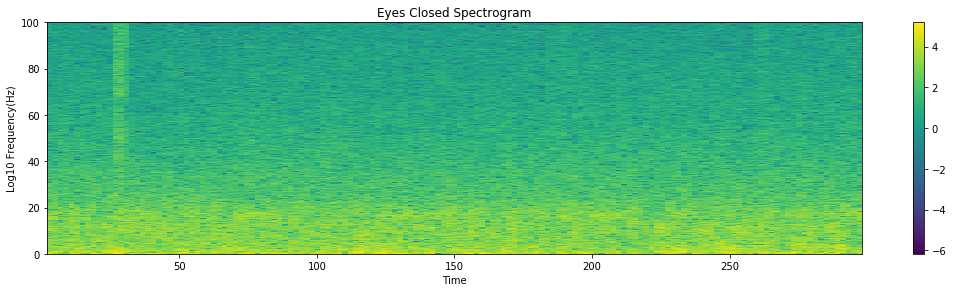

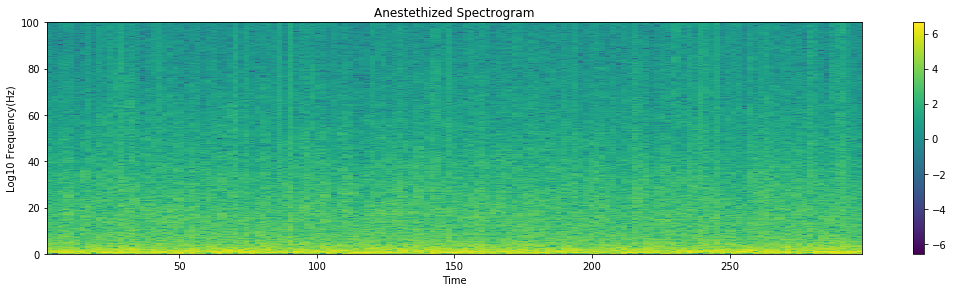

In [8]:
# We will use spectrogram to get the power spectrum of the signal by using singal.spectrogram (stft)
# We pick a window size of 4 because we found some low frequency (close to 1) in our first pass, so we want to 
# Make sure we capture all low frequencies. Since we think these frequencies should be present and not 
# changing quickly, we are okay giving away some temporal resolution
len_win=4
len_overlap=2
f_sp, t_sp, open_sp = signal.spectrogram(eyesopen, fs, window='rect', nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
plot_spectrogram(np.log10(open_sp), t_sp, f_sp, freq_lims=[0,100], plot_db=False)
plt.title('Eyes Open Spectrogram');
f_sp, t_sp, closed_sp = signal.spectrogram(eyesclosed, fs, window='rect', nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
plot_spectrogram(np.log10(closed_sp), t_sp, f_sp, freq_lims=[0,100], plot_db=False)
plt.title('Eyes Closed Spectrogram');
f_sp, t_sp, anes_sp = signal.spectrogram(anes, fs, window='rect', nperseg=int(fs*len_win), noverlap=int(fs*len_overlap), detrend=False)
plot_spectrogram(np.log10(anes_sp), t_sp, f_sp, freq_lims=[0,100], plot_db=False)
plt.title('Anestethized Spectrogram');

Eyes Open: 203026.015625
Eyes Closed: 234664.28125
Anesthesized: 2996113.25


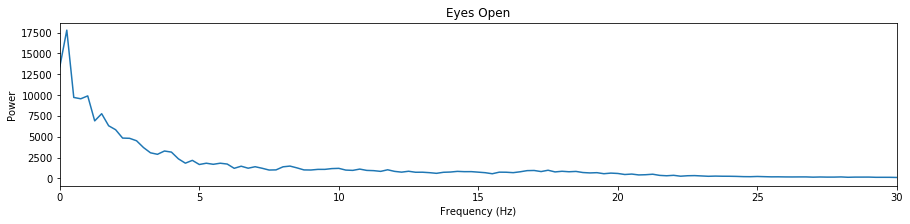

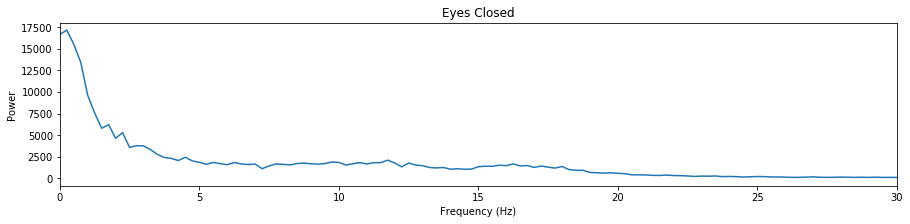

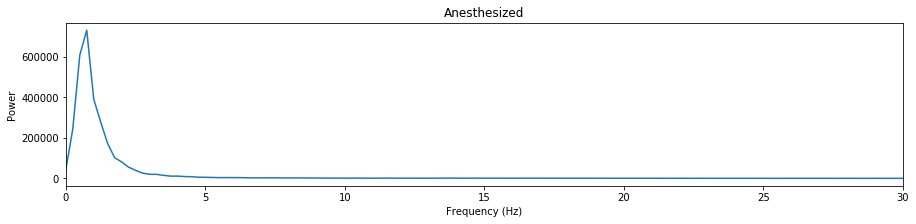

In [9]:
# Anesthesized has a lot more power.
spg_anes = np.mean(anes_sp,axis=1)
spg_open = np.mean(open_sp,axis=1)
spg_closed = np.mean(closed_sp,axis=1)

plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_open,label="Eyes Open")
plt.xlabel("Frequency (Hz)"); plt.ylabel("Power")
plt.title('Eyes Open')
plt.xlim([0,30]);


plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_closed)
plt.xlabel("Frequency (Hz)"); plt.ylabel("Power")
plt.title('Eyes Closed')
plt.xlim([0,30]);

plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_anes)
plt.xlabel("Frequency (Hz)"); plt.ylabel("Power")
plt.title('Anesthesized')
plt.xlim([0,30]);
print('Eyes Open: {}'.format(np.sum(spg_open)))
print('Eyes Closed: {}'.format(np.sum(spg_closed)))
print('Anesthesized: {}'.format(np.sum(spg_anes)))

Eyes Open: -713.0614624023438
Eyes Closed: -920.2694091796875
Anesthesized: -535.0897216796875


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


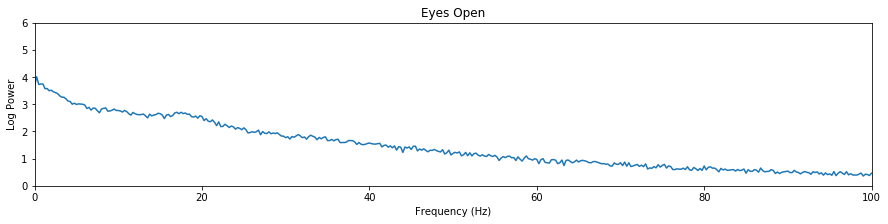

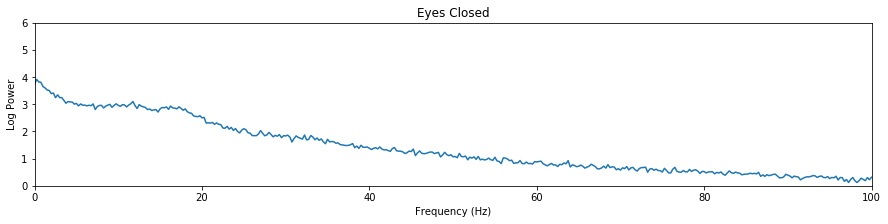

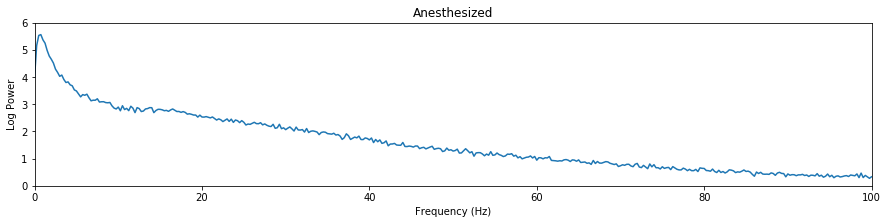

In [10]:
# Anesthesized has a lot more power.
spg_anes = np.mean(np.log10(anes_sp),axis=1)
spg_open = np.mean(np.log10(open_sp),axis=1)
spg_closed = np.mean(np.log10(closed_sp),axis=1)

plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_open,label="Eyes Open")
plt.xlabel("Frequency (Hz)"); plt.ylabel("Log Power")
plt.title('Eyes Open')
plt.xlim([0,100]); plt.ylim([0,6])


plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_closed)
plt.xlabel("Frequency (Hz)"); plt.ylabel("Log Power")
plt.title('Eyes Closed')
plt.xlim([0,100]); plt.ylim([0,6])

plt.figure(figsize=(15,3))
plt.plot(f_sp,spg_anes)
plt.xlabel("Frequency (Hz)"); plt.ylabel("Log Power")
plt.title('Anesthesized')
plt.xlim([0,100]); plt.ylim([0,6])
print('Eyes Open: {}'.format(np.sum(spg_open)))
print('Eyes Closed: {}'.format(np.sum(spg_closed)))
print('Anesthesized: {}'.format(np.sum(spg_anes[spg_anes!= -inf])))

Filtering and Correlation: After we isolated the frequency range we picked for each state, we compared the voltage change in the time domain and the power spectrums of these filtered signals (orange lines) with those of the original signals (blue lines). We found that the orange lines roughly follow the shapes of the original signals in wave comparison plots. As for power spectrums, it is clear that the filtered signals mostly overlap with the center (and also the part with the highest values) of the original signal. It further proved that the frequency ranges we picked well represent the dominant frequencies of the recorded brain signals. 
Although the correlations between the filtered signals and the original signals are still high in other stages (~80% and ~76%), the correlation value for the anesthetized state is phenomenal (~ 97%). That may indicate the signal in anesthetized state consists of less powerful higher frequencies. It is also congruent with the higher power we found in the previous section.


Eyes Open: 0.7994051322999154


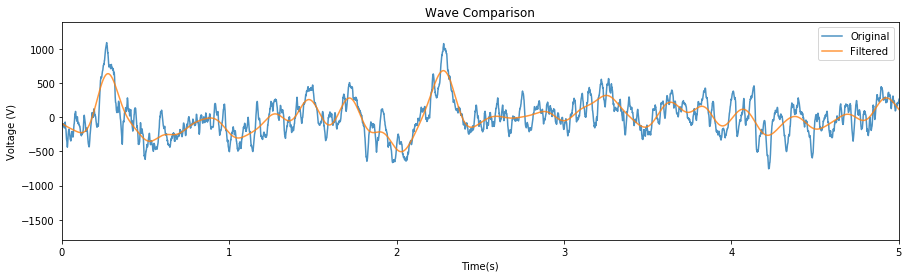

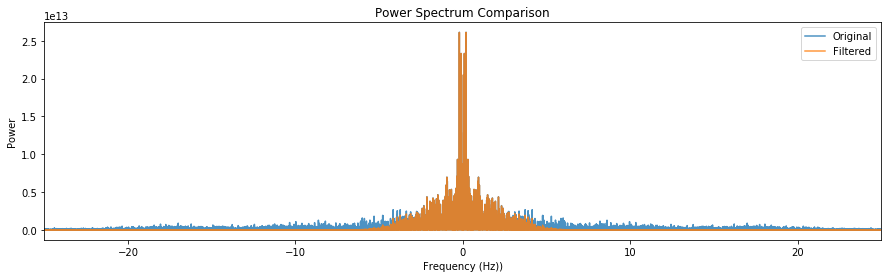

In [11]:
# We will be using a cutoff of 5 for the eyes open (0-5Hz)
# We also print the correlation between the signal and the filtered signal in order to see 
# How well the filtered signal stays true to the original signal
cutoff = 5
pass_zero=True
open_filt = getanalytical(eyesopen,cutoff=cutoff,pass_zero=pass_zero)
print('Eyes Open: {}'.format(np.corrcoef(eyesopen,open_filt)[1,0]))

Eyes Closed: 0.7612227198823485


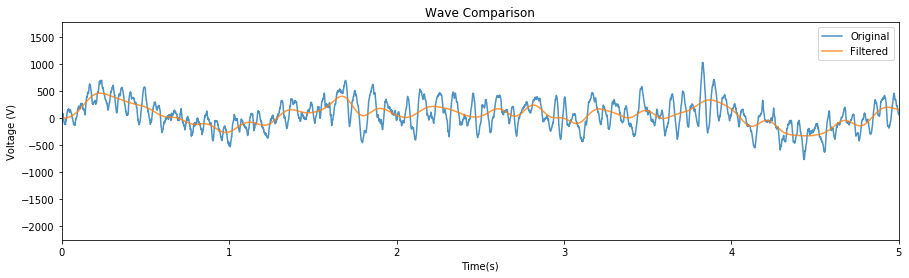

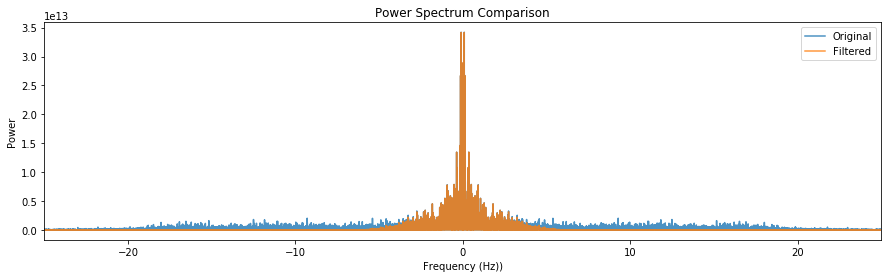

In [12]:
# We will be using a cutoff of 5 for the eyes closed (0-5Hz)
cutoff = 5
closed_filt = getanalytical(eyesclosed,cutoff=cutoff,pass_zero=pass_zero)
print('Eyes Closed: {}'.format(np.corrcoef(eyesclosed,closed_filt)[1,0]))

Anesthesized: 0.9701158134237569


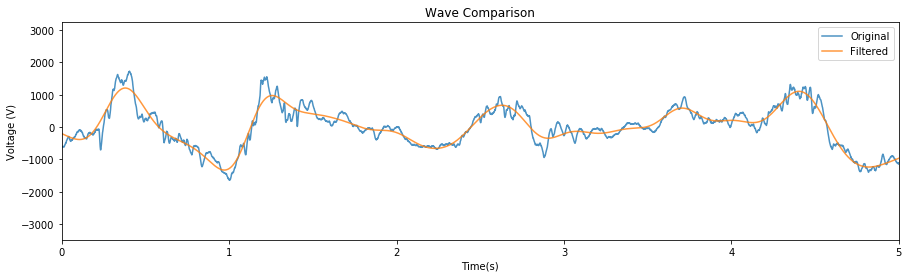

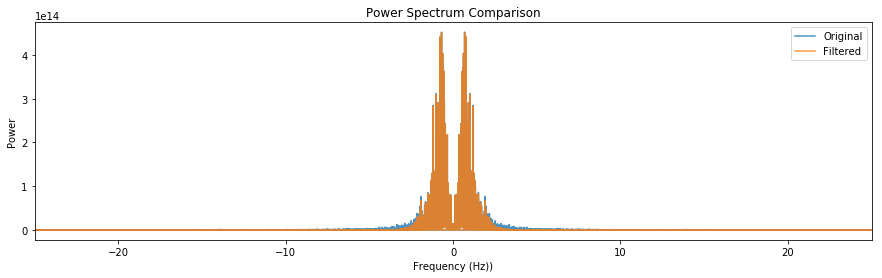

In [13]:
# Because the distribution was different for the 0-3Hz, we will be using a smaller filter.
cutoff = 3
anes_filt = getanalytical(anes,cutoff=cutoff,pass_zero=pass_zero)
print('Anesthesized: {}'.format(np.corrcoef(anes,anes_filt)[1,0]))

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


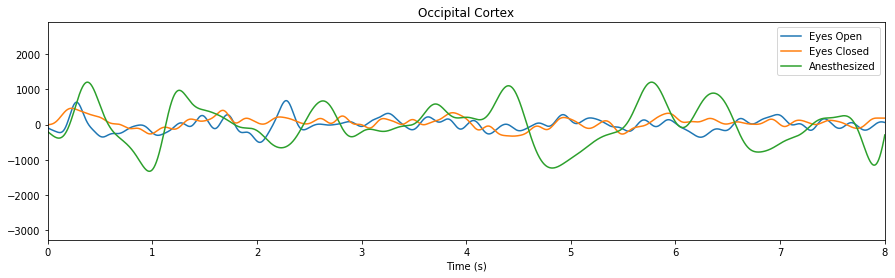

In [14]:
# Now we get the Analytical signal after filtering it and plot it.
hil_aneso = signal.hilbert(anes_filt)
hil_openo = signal.hilbert(open_filt)
hil_closedo = signal.hilbert(closed_filt)
plt.figure(figsize=(15,4))
plt.plot(time,hil_openo,label='Eyes Open')
plt.plot(time,hil_closedo,label='Eyes Closed')
plt.plot(time,hil_aneso,label='Anesthesized')
plt.xlim([0,8])
plt.xlabel("Time (s)")
plt.title("Occipital Cortex")
plt.legend()

Hilbert and Cross Correlation: From the plots of cross correlations across different brain regions for all three states, we found that in all states, the cross correlations are the highest when time lag is around 0, and show overall decreasing patterns as time lag increases, which indicates there are no significant time delays between brain signals recorded in different regions. Here, the cross correlation value is normalized, so the value 1 doesn’t necessarily mean a correlation of 1. For the eyes closed and anesthetized states, correlation values were overall greater across brain areas, that might be due to lack of visual inputs during those states.


Eyes Open: 0.8598861941123473
Eyes Open: 0.7643437703543698


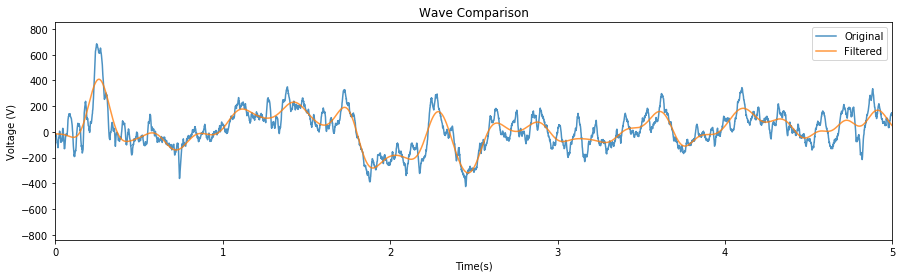

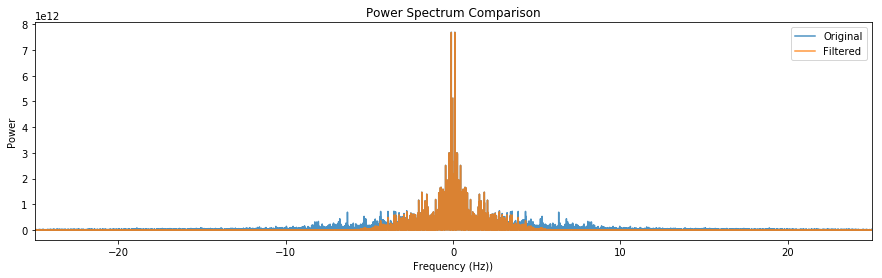

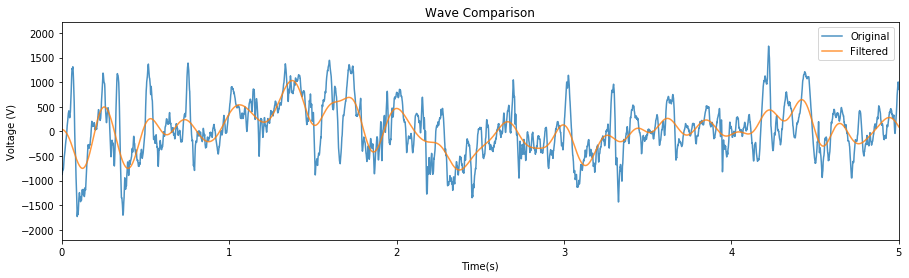

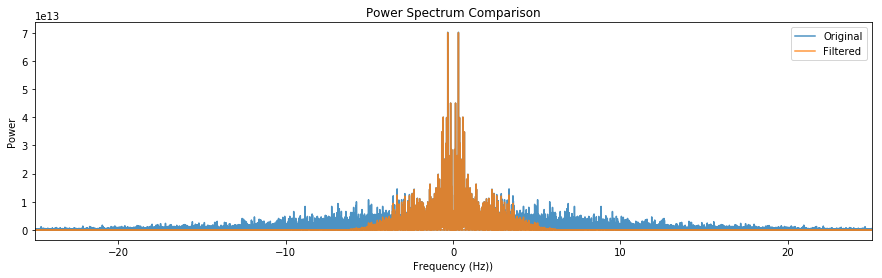

In [15]:
# Get analytical signals for the rest of them
# Eyes Open
cutoff=5
open_filtc = getanalytical(opencing,cutoff=cutoff,pass_zero=pass_zero)
hil_openc = signal.hilbert(open_filtc)
open_filtt = getanalytical(opentemp,cutoff=cutoff,pass_zero=pass_zero)
hil_opent = signal.hilbert(open_filtt)
print('Eyes Open: {}'.format(np.corrcoef(opencing,open_filtc)[1,0]))
print('Eyes Open: {}'.format(np.corrcoef(opentemp,open_filtt)[1,0]))

Eyes Closed: 0.8524291968589742
Eyes Closed: 0.8076831225771941


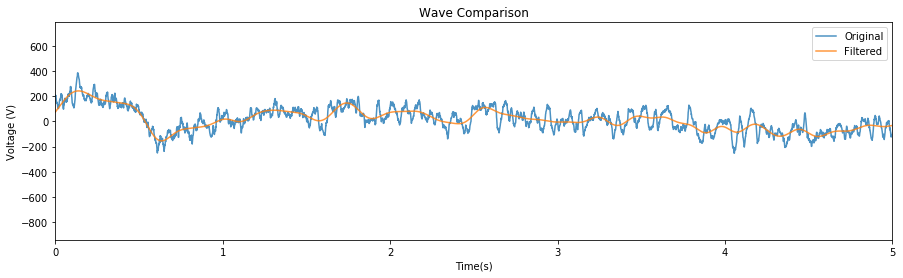

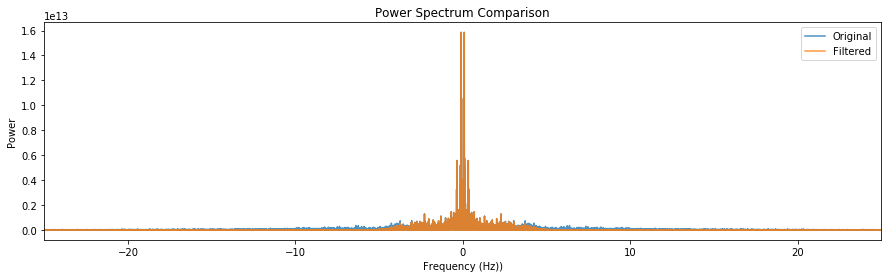

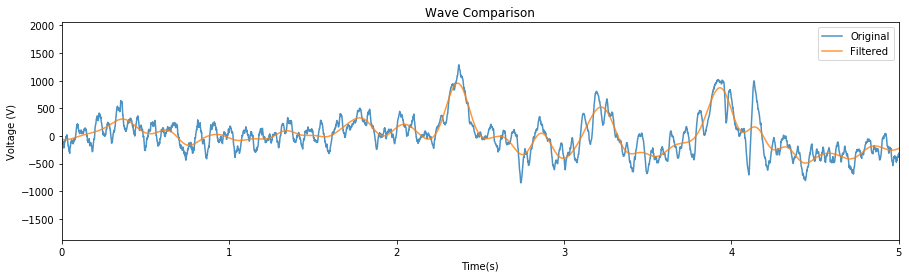

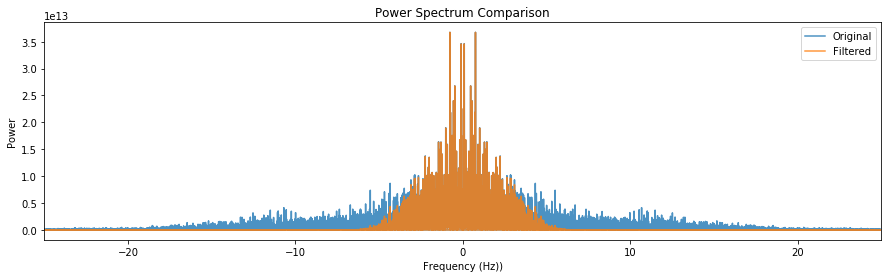

In [16]:
# Eyes Closed
cutoff=5
closed_filtc = getanalytical(closedcing,cutoff=cutoff,pass_zero=pass_zero)
hil_closedc = signal.hilbert(closed_filtc)
closed_filtt = getanalytical(closedtemp,cutoff=cutoff,pass_zero=pass_zero)
hil_closedt = signal.hilbert(closed_filtt)
print('Eyes Closed: {}'.format(np.corrcoef(closedcing,closed_filtc)[1,0]))
print('Eyes Closed: {}'.format(np.corrcoef(closedtemp,closed_filtt)[1,0]))

Anesthesized: 0.972724185560933
Anesthesized: 0.9552351307669186


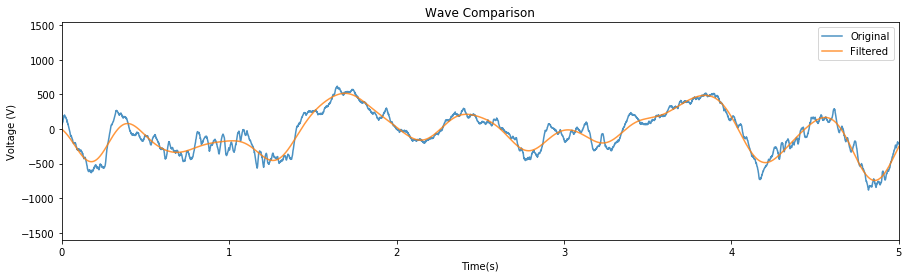

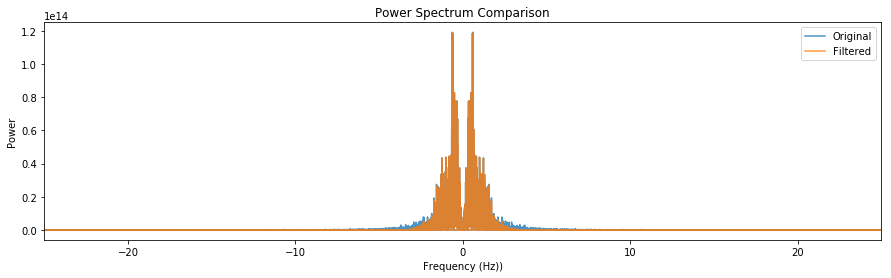

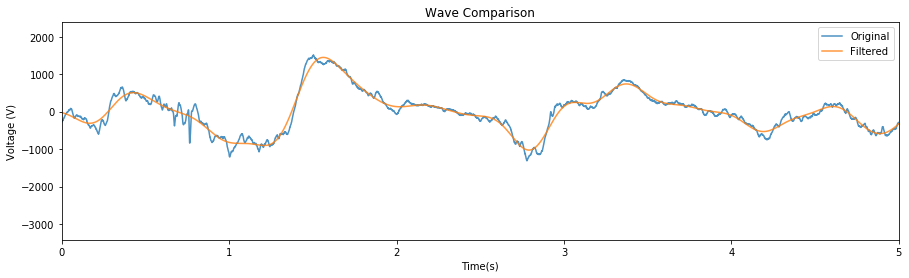

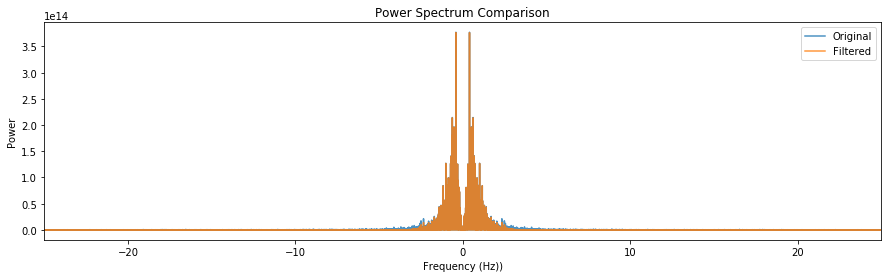

In [17]:
# Anesthesized
cutoff=3
anes_filtc = getanalytical(anescing,cutoff=cutoff,pass_zero=pass_zero)
hil_anesc = signal.hilbert(anes_filtc)
anes_filtt = getanalytical(anestemp,cutoff=cutoff,pass_zero=pass_zero)
hil_anest = signal.hilbert(anes_filtt)
print('Anesthesized: {}'.format(np.corrcoef(anescing,anes_filtc)[1,0]))
print('Anesthesized: {}'.format(np.corrcoef(anestemp,anes_filtt)[1,0]))

[[1.         0.38001488]
 [0.38001488 1.        ]]
[[1.         0.11724689]
 [0.11724689 1.        ]]


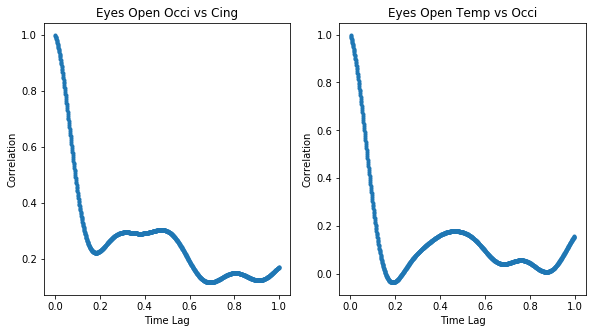

In [18]:
# Richard Gao provided us with this function
def xcorr(data1, data2, maxlag=100, zero_center=False):
    acf = np.zeros(maxlag)
    acf[0] = np.correlate(data1,data2)
    for lag in range(1,maxlag):
        acf[lag] = np.correlate(data1[:-lag],data2[lag:])
    acf /= acf[0]
    if zero_center: acf[0]=np.nan
    return acf

plt.figure(figsize=(15,5))
maxlag=int(fs)
t_ac = np.arange(0,maxlag/fs,1/fs)
plt.subplot(1,3,1)
plt.plot(t_ac, xcorr(hil_openo.real,hil_openc.real, maxlag, True), '.')
plt.ylabel("Correlation");plt.xlabel("Time Lag")
plt.title('Eyes Open Occi vs Cing')
plt.subplot(1,3,2)
plt.plot(t_ac, xcorr(hil_opent.real, hil_openo.real, maxlag, True), '.') 
plt.ylabel("Correlation");plt.xlabel("Time Lag")
plt.title('Eyes Open Temp vs Occi')
print(np.corrcoef(hil_openo.real,hil_openc.real))
print(np.corrcoef(hil_openo.real,hil_opent.real))

0.5083084902360524
0.24188485480792637


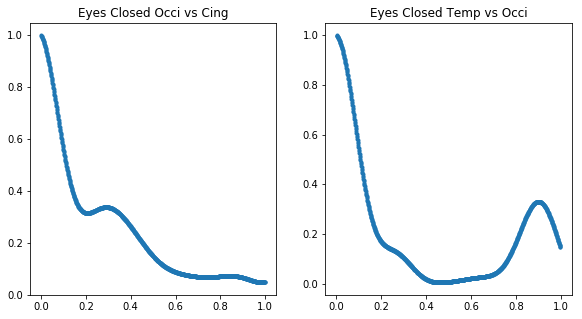

In [19]:
# Correlation for eyes closed
# They look very similar to the eyes open.
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t_ac, xcorr(hil_closedo.real,hil_closedc.real, maxlag, True), '.')
plt.title('Eyes Closed Occi vs Cing')
plt.subplot(1,3,2)
plt.plot(t_ac, xcorr(hil_closedt.real, hil_closedo.real, maxlag, True), '.') 
plt.title('Eyes Closed Temp vs Occi')
print(np.corrcoef(hil_closedo.real,hil_closedc.real)[1,0])
print(np.corrcoef(hil_closedo.real,hil_closedt.real)[1,0])

[[1.         0.21201858]
 [0.21201858 1.        ]]
[[1.         0.47010968]
 [0.47010968 1.        ]]


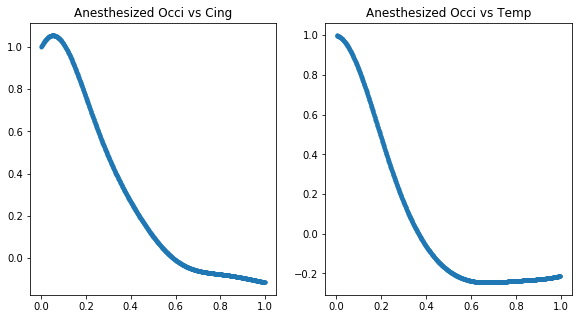

In [20]:
# Anesthetized correlations.
# The correlations actually goes up first before going down in the occipital versus cingulate.
# We are not sure of why this is the case, maybe it has to do with syncronicity or wave shift.
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(t_ac, xcorr(hil_aneso.real,hil_anesc.real, maxlag, True), '.')
plt.title('Anesthesized Occi vs Cing')
plt.subplot(1,3,2)
plt.plot(t_ac, xcorr(hil_anesc.real, hil_anest.real, maxlag, True), '.')
plt.title('Anesthesized Occi vs Temp')
print(np.corrcoef(hil_aneso.real,hil_anesc.real))
print(np.corrcoef(hil_aneso.real,hil_anest.real))

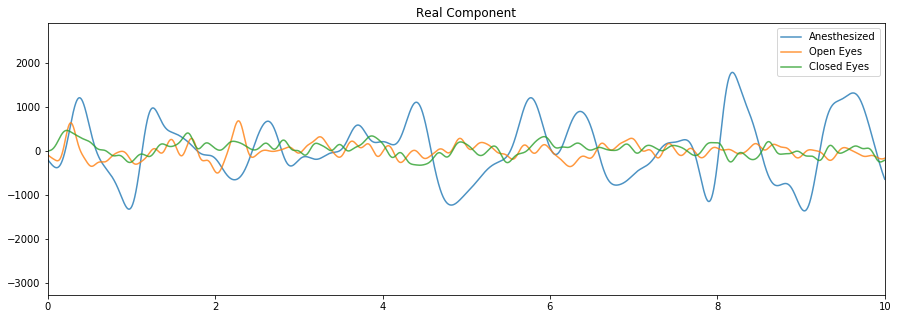

In [21]:
# Plotting the three occipital real component
# The awake states both look very similar.
# Since this is only 1-3 for the anesthetized, we believe this could be because the delta wave is characteristic
# of the anesthetized state
plt.figure(figsize=(15,5))
plt.plot(time,hil_aneso.real, alpha=0.8, label='Anesthesized')
plt.plot(time,hil_openo.real, alpha=0.8, label='Open Eyes')
plt.plot(time,hil_closedo.real, alpha=0.8, label='Closed Eyes')
plt.xlim([0,10])
plt.title("Real Component")
plt.legend()

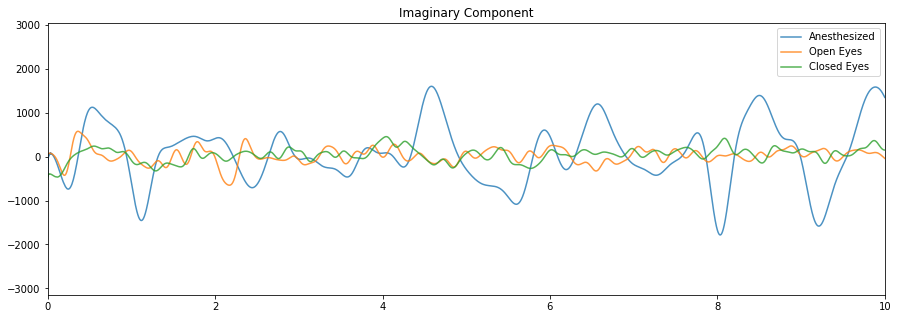

In [22]:
# plotting the Imag component for the hilbert frequencies.
plt.figure(figsize=(15,5))
plt.plot(time,hil_aneso.imag, alpha=0.8, label='Anesthesized')
plt.plot(time,hil_openo.imag, alpha=0.8, label='Open Eyes')
plt.plot(time,hil_closedo.imag, alpha=0.8, label='Closed Eyes')
plt.xlim([0,10])
plt.title("Imaginary Component")
plt.legend()

## Conclusions and Results
We did not find significant differences between the eyes open and eyes closed states. We did find differences between the anesthetized and awake states.
	We hypothesized dominant delta waves (around 0.5-3Hz) in the anesthetized state. We did find a lower frequency distribution, particularly around 1-3Hz range, which supports our hypothesis. Our results were consistent even after computing the log10 of the power spectrum.
	We did find a more evenly spread, and higher frequencies overall, in the awake state, both eyes open and closed; however, we did not find a dominant alpha frequency. Even though we found higher power in the alpha wave frequencies for the awake state compared to the anesthetized state, we cannot conclude that the alpha wave was characteristic in the awake state. This is because it did not stand out in the power spectrum as much as the delta did for the anesthetized and we did not perform any sort of confirmatory statistics. 
	We found the anesthetized had higher overall power. This could be due to more synchronicity in the brain, but it can also be due to lower frequencies, since it is known that lower frequencies usually have higher power. Because the anesthetized state has a lower frequency distribution, it has more power in general. Even after computing log10 power, the anesthetized had more power. This supports our hypothesis of higher synchronicity in the anesthetized state, since higher power may be due to excitatory and inhibitory neurons interacting less and “taking turns” to fire.
We saw different cross correlation patterns between the awake and anesthetized states. For the anesthetized, correlation quickly dropped between the brain areas. This does suggest that there is a high correlation between the signals without time lag.  For the awake state, particularly between the cingulate and temporal cortex, correlation went up at many time lags. This may suggest communication between brain areas not seen in the anesthetized state. It could also just be that, especially since the cingulate and temporal areas of the brain are close, they could be capturing a lot of the same frequencies. Overall, we found no time shift that provided us with better correlation than the one obtained without any timeshift, except for the anesthetized state. The maximum correlation was with 0.1s time lag between the signals. We are not entirely sure why this could happen, but because frequencies at anesthetized are 1-3Hz, maybe the delay in communication or distance between the occipital and cingulate is causing the phases to be displaced. While it is not as noticable between the temporal and occipital, but correlation does go up before going down.

## Potential limitations of the methods chosen 
Barring limitations from data collection and availability, our biggest limitation was the usage of STFT to find important frequencies. Not only did we had to make a decision on which window sizes to use for the STFT, but we also used the results to guide our filter decisions for the analytical signal. We used both the log power and power plots to find reasonable windows, but we had to make a subjective decision in the end. We tested different parameters and plotted the results, but it does not mean we found the optimal (if there is such a thing for this task) values.
Our literature and ideas of what we expect to find could have also impacted our analysis. For example, we thought that lower frequencies would be found in the anesthetized state. When we saw the power spectrum, it confirmed that. It is known that that lower frequencies tend to have higher power. Using log10 power still gave us a higher distribution for lower frequencies in anesthetized, but the results were not as pronounced.
In addition, our sources came from experiments on humans and not monkeys. So not only is brain physiology a factor, but also the fact that the mental state of monkeys versus animals could be different. Humans could have been relaxed in the experiment, while monkeys could have been confused. Brain states, brain physiology, and lab conditions played a role and they could have greatly affected which frequencies are present.


## Contributions
All members were part of the conversation regarding researd question, methods, and code development.c
We were all present in group meetings and group chats and parameter choices for our analysis was done as a team.

* Alexandra: Worked on the methods and parameter decision section for both the powerpoint presentation and notebook.
* Elizabeth: Helped do research that guided hypothesis and wrote discussion of existing research and research question and hypothesis portion of the paper
* Kevin: Helped come up with the results and conclusions of the project for both the notebook and presentation.
* Xuanyu: Wrote analysis section for both the powerpoint and jupyter notebook. 


## References 
Berger H, Gray CM (1929). "Uber das Elektroenkephalogramm des Menschen". Arch Psychiat
Nervenkr. 87: 527–570. doi:10.1007/BF01797193

Hagihira S (2017). Brain Mechanisms during Course of Anesthesia: What We Know from EEG
Changes during Induction and Recovery. Frontiers in systems neuroscience, 11, 39.
doi:10.3389/fnsys.2017.00039

Li D, Voss LJ, Sleigh JW, Li X (2013), Effects of volatile anesthetic agents on cerebral cortical
synchronization in sheep. Anesthesiology. 119: 81-8.
doi:10.1097/ALN.0b013e31828e894f.

Sharma A, Singh S (2015), "Assessing alpha activity in attention and relaxed state: An EEG
analysis". 2015 1st International Conference on Next Generation Computing
Technologies (NGCT). 508-513. doi: 10.1109/NGCT.2015.7375171